In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 10

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
25/42 [================>.............] - ETA: 0s - loss: 2.3164 - accuracy: 0.1047 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 1s 8ms/step - loss: 2.3074 - accuracy: 0.1173 - val_loss: 2.2762 - val_accuracy: 0.1746
Epoch 2/1000
26/42 [=================>............] - ETA: 0s - loss: 2.2740 - accuracy: 0.1508
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 2.2654 - accuracy: 0.1542 - val_loss: 2.2243 - val_accuracy: 0.2908
Epoch 3/1000
27/42 [==================>...........] - ETA: 0s - loss: 2.2333 - accuracy: 0.1907
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 2.2248 - accuracy: 0.1948 - val_loss: 2.1533 - val_accuracy: 0.3296
Epoch 4/1000
20/42 [=============>................] - ETA: 0s - loss: 2.1868 - accuracy: 0.2078


30/42 [====================>.........] - ETA: 0s - loss: 1.3377 - accuracy: 0.5344
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.3216 - accuracy: 0.5411 - val_loss: 0.8461 - val_accuracy: 0.8641
Epoch 29/1000
26/42 [=================>............] - ETA: 0s - loss: 1.2965 - accuracy: 0.5505
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.3076 - accuracy: 0.5471 - val_loss: 0.8262 - val_accuracy: 0.8366
Epoch 30/1000
35/42 [========================>.....] - ETA: 0s - loss: 1.2874 - accuracy: 0.5609
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.2880 - accuracy: 0.5583 - val_loss: 0.8123 - val_accuracy: 0.8636
Epoch 31/1000
30/42 [====================>.........] - ETA: 0s - loss: 1.2938 - accuracy: 0.5536
Epoch 31

32/42 [=====================>........] - ETA: 0s - loss: 1.1529 - accuracy: 0.6064
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.1411 - accuracy: 0.6075 - val_loss: 0.6596 - val_accuracy: 0.8911
Epoch 56/1000
26/42 [=================>............] - ETA: 0s - loss: 1.1546 - accuracy: 0.5904
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 1.1479 - accuracy: 0.5940 - val_loss: 0.6532 - val_accuracy: 0.8798
Epoch 57/1000
33/42 [======================>.......] - ETA: 0s - loss: 1.1188 - accuracy: 0.6058
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.1136 - accuracy: 0.6083 - val_loss: 0.6547 - val_accuracy: 0.8725
Epoch 58/1000
34/42 [=======================>......] - ETA: 0s - loss: 1.1128 - accuracy: 0.6204
Epoch 58

24/42 [================>.............] - ETA: 0s - loss: 1.0306 - accuracy: 0.6361
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.0324 - accuracy: 0.6470 - val_loss: 0.5849 - val_accuracy: 0.9023
Epoch 83/1000
32/42 [=====================>........] - ETA: 0s - loss: 1.0188 - accuracy: 0.6538
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 1.0131 - accuracy: 0.6560 - val_loss: 0.5821 - val_accuracy: 0.8989
Epoch 84/1000
20/42 [=============>................] - ETA: 0s - loss: 1.0329 - accuracy: 0.6492
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 1.0216 - accuracy: 0.6545 - val_loss: 0.5814 - val_accuracy: 0.9023
Epoch 85/1000
30/42 [====================>.........] - ETA: 0s - loss: 1.0082 - accuracy: 0.6568
Epoch 85

26/42 [=================>............] - ETA: 0s - loss: 0.9438 - accuracy: 0.6815
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9545 - accuracy: 0.6807 - val_loss: 0.5702 - val_accuracy: 0.8961
Epoch 110/1000
25/42 [================>.............] - ETA: 0s - loss: 1.0083 - accuracy: 0.6497
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9775 - accuracy: 0.6659 - val_loss: 0.5676 - val_accuracy: 0.8995
Epoch 111/1000
23/42 [===============>..............] - ETA: 0s - loss: 0.9764 - accuracy: 0.6658
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 4ms/step - loss: 0.9596 - accuracy: 0.6712 - val_loss: 0.5559 - val_accuracy: 0.9079
Epoch 112/1000
21/42 [==============>...............] - ETA: 0s - loss: 0.9525 - accuracy: 0.6756
Ep

Epoch 136/1000
28/42 [===================>..........] - ETA: 0s - loss: 0.9452 - accuracy: 0.6780
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 0.9237 - accuracy: 0.6850 - val_loss: 0.5387 - val_accuracy: 0.9006
Epoch 137/1000
40/42 [===========================>..] - ETA: 0s - loss: 0.9063 - accuracy: 0.6895
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 0.9085 - accuracy: 0.6878 - val_loss: 0.5576 - val_accuracy: 0.8939
Epoch 138/1000
40/42 [===========================>..] - ETA: 0s - loss: 0.9322 - accuracy: 0.6809
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
42/42 [==============================] - 0s 3ms/step - loss: 0.9358 - accuracy: 0.6798 - val_loss: 0.5669 - val_accuracy: 0.8933
Epoch 139/1000
40/42 [===========================>..] - ETA: 0s - loss: 0.9201 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.9040


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 102ms/step
[1.5977426e-01 3.5585035e-03 4.0494036e-03 1.1115404e-03 4.6912436e-03
 3.6007622e-03 8.1319052e-01 4.7364454e-03 4.6055638e-03 6.8186957e-04]
6


# 混同行列

56/56 [==============================] - 0s 1ms/step


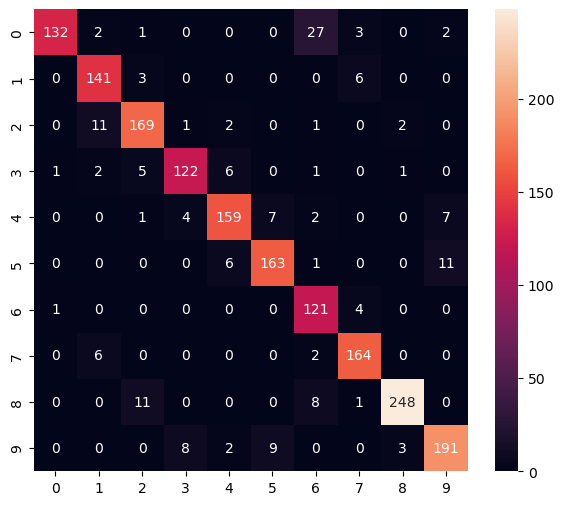

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       167
           1       0.87      0.94      0.90       150
           2       0.89      0.91      0.90       186
           3       0.90      0.88      0.89       138
           4       0.91      0.88      0.90       180
           5       0.91      0.90      0.91       181
           6       0.74      0.96      0.84       126
           7       0.92      0.95      0.94       172
           8       0.98      0.93      0.95       268
           9       0.91      0.90      0.90       213

    accuracy                           0.90      1781
   macro avg       0.90      0.90      0.90      1781
weighted avg       0.91      0.90      0.90      1781



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp9ehc17_k\assets


6808

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5977420e-01 3.5585044e-03 4.0494050e-03 1.1115401e-03 4.6912436e-03
 3.6007648e-03 8.1319040e-01 4.7364491e-03 4.6055657e-03 6.8186969e-04]
6
